Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [43]:
# Importing the required packages here
import wordcloud
import missingno
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [44]:
#### load the movie dataset and create their dataframes

movies_df = pd.read_csv("movies.csv")
movies_df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [45]:
movies_df = movies_df.drop(['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'], axis=1)

#### Remove any duplicate rows

In [46]:
movies_df.drop_duplicates(keep= "first", inplace=True)

<AxesSubplot: >

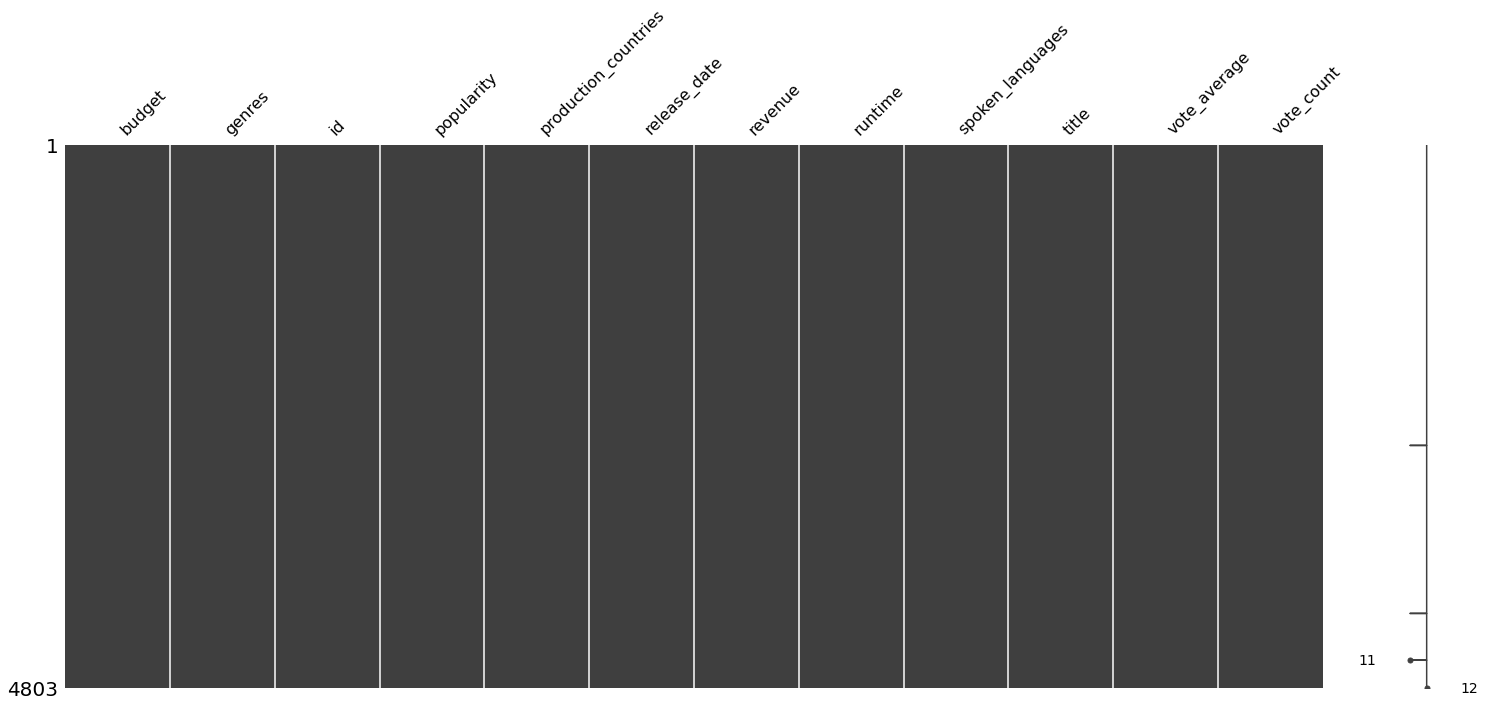

In [47]:
missingno.matrix(movies_df)

In [48]:
movies_df.isna().sum()

budget                  0
genres                  0
id                      0
popularity              0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
title                   0
vote_average            0
vote_count              0
dtype: int64

#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [49]:

movies_df = movies_df[movies_df.budget != 0]
movies_df = movies_df[movies_df.revenue != 0]

In [50]:
# check how many values are missing
movies_df.isna().sum()

budget                  0
genres                  0
id                      0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
title                   0
vote_average            0
vote_count              0
dtype: int64

Three entries were missing from the database but upon removing any zero value entries from "budget" and "revenue" the missing data was removed, as it must have been included in the rows with Zero budget and or revenue.

<AxesSubplot: >

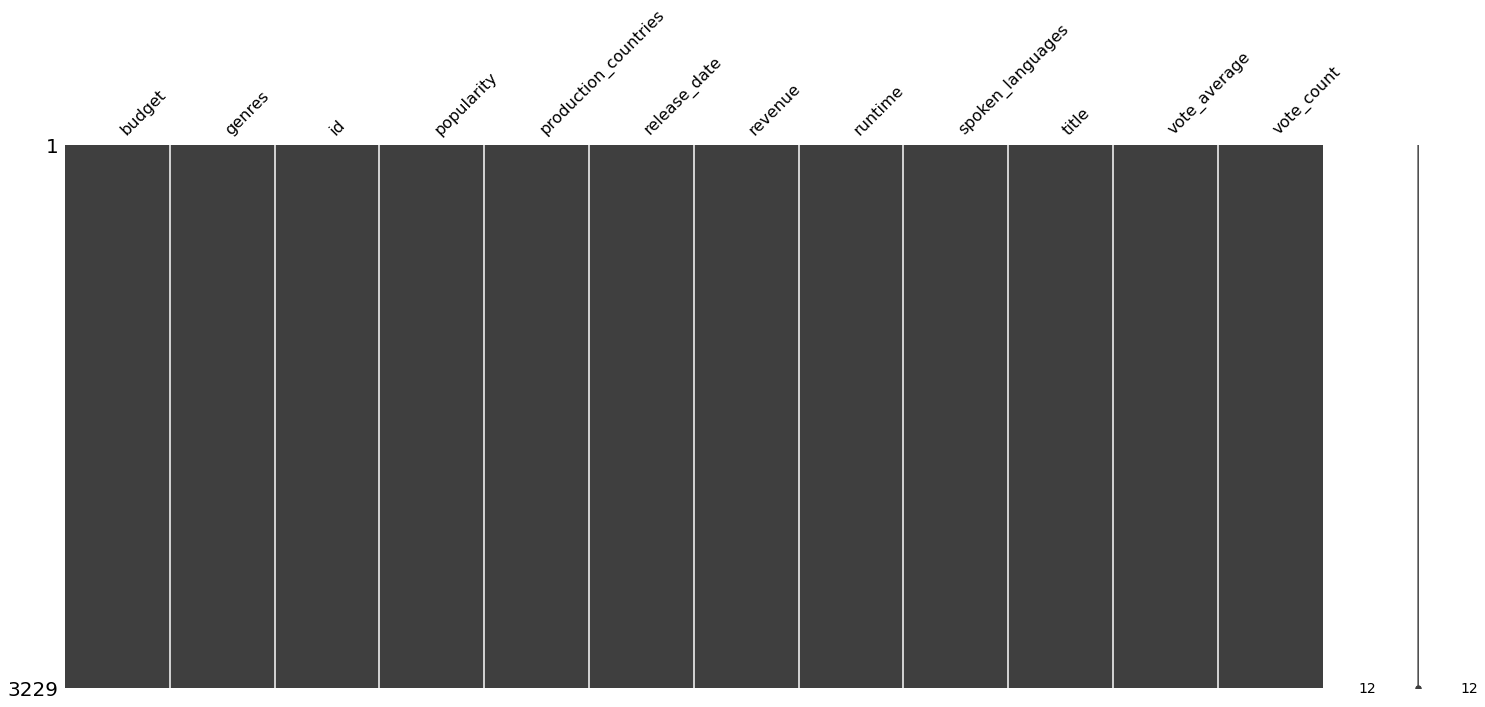

In [51]:
missingno.matrix(movies_df)

#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [52]:
# Change the release_date column to DateTime column
movies_df["release_date"] = pd.to_datetime(movies_df['release_date'], format='%Y-%m-%d')

# Extract the release year from every release date
movies_df["release_year"] =  movies_df['release_date'].dt.strftime('%Y')


#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [53]:
# Convert single columns to int dtype.
movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [54]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)

parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
# parse_col_json('cast', 'name')  # there is no cast column in our dataframe
parse_col_json('production_countries', 'name')

movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.



In [55]:
# creating new columns for better analysis
movies_df["profit"] = movies_df["revenue"] - movies_df["budget"]
movies_df["ROI"] = movies_df["profit"] / movies_df["budget"]

#creating top5 and bottom5 values for later analysis
top_5 = movies_df.sort_values("budget", ascending=False).head(5)
bottom_5 = movies_df.nsmallest(5, "budget")
print(top_5)
print(bottom_5)


       budget                                             genres     id  \
17  380000000                 ['Adventure', 'Action', 'Fantasy']   1865   
1   300000000                 ['Adventure', 'Fantasy', 'Action']    285   
7   280000000         ['Action', 'Adventure', 'Science Fiction']  99861   
10  270000000  ['Adventure', 'Fantasy', 'Action', 'Science Fi...   1452   
4   260000000         ['Action', 'Adventure', 'Science Fiction']  49529   

    popularity          production_countries release_date     revenue  \
17  135.413856  ['United States of America']   2011-05-14  1045713802   
1   139.082615  ['United States of America']   2007-05-19   961000000   
7   134.279229  ['United States of America']   2015-04-22  1405403694   
10   57.925623  ['United States of America']   2006-06-28   391081192   
4    43.926995  ['United States of America']   2012-03-07   284139100   

    runtime                    spoken_languages  \
17    136.0              ['English', 'Español']   
1     16

In [66]:
movies_df.sort_values(by = ['profit'], ascending=False)[['title', 'profit', 'revenue', 'budget']]

,title,profit,revenue,budget
0,Avatar,2550965087,2787965087,237000000
25,Titanic,1645034188,1845034188,200000000
28,Jurassic World,1363528810,1513528810,150000000
44,Furious 7,1316249360,1506249360,190000000
16,The Avengers,1299557910,1519557910,220000000
...,...,...,...,...
311,The Adventures of Pluto Nash,-92896027,7103973,100000000
208,The 13th Warrior,-98301101,61698899,160000000
141,Mars Needs Moms,-111007242,38992758,150000000
338,The Alamo,-119180039,25819961,145000000


In [67]:
display(movies_df[movies_df['profit'] == movies_df['profit'].max()])
display(movies_df[movies_df['profit'] == movies_df['profit'].min()])

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit,ROI
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087,10.763566


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit,ROI
13,255000000,"['Action', 'Adventure', 'Western']",57201,49.046956,['United States of America'],2013-07-03,89289910,149.0,['English'],The Lone Ranger,5.9,2311,2013,-165710090,-0.649843


Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.



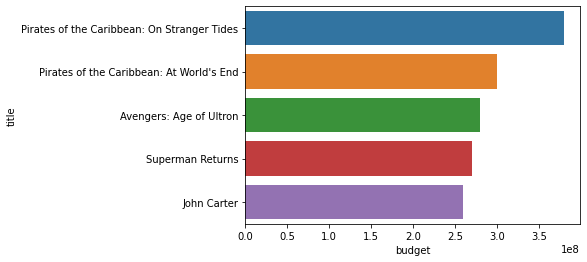

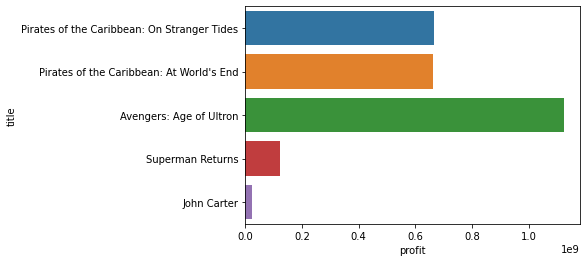

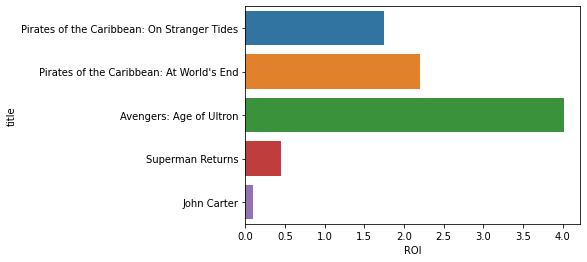

In [57]:

sns.barplot(movies_df, y=top_5["title"], x=top_5["budget"])
plt.show()

sns.barplot(movies_df, y=top_5["title"], x=top_5["profit"])
plt.show()

sns.barplot(movies_df, y=top_5["title"], x=top_5["ROI"])
plt.show()

#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

<function matplotlib.pyplot.show(close=None, block=None)>

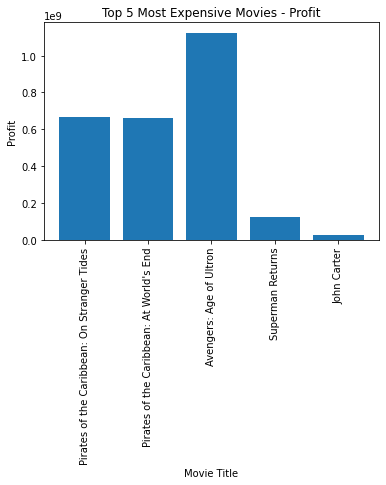

In [58]:
# code here
plt.bar(top_5["title"], top_5["profit"])
plt.xlabel("Movie Title")
plt.ylabel("Profit")
plt.title("Top 5 Most Expensive Movies - Profit")
plt.xticks(rotation=90)
plt.show



#### Find the most talked about movies. Sort the dataframe based on the popularity column.

In [59]:
movies_df.sort_values(by = 'popularity', ascending = False).head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit,ROI
546,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,1156730962,91.0,['English'],Minions,6.4,4571,2015,1082730962,14.631499
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],Interstellar,8.1,10867,2014,510120017,3.091636
788,58000000,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,783112979,108.0,['English'],Deadpool,7.4,10995,2016,725112979,12.501948
94,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,773328629,121.0,['English'],Guardians of the Galaxy,7.9,9742,2014,603328629,3.548992
127,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,378858340,120.0,['English'],Mad Max: Fury Road,7.2,9427,2015,228858340,1.525722


#### Find Movies which are rated above 7



In [60]:
# Code here

movies_df[movies_df["vote_average"] >= 7.0]


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit,ROI
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087,10.763566
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012,834939099,3.339756
6,260000000,"['Animation', 'Family']",38757,48.681969,['United States of America'],2010-11-24,591794936,100.0,['English'],Tangled,7.4,3330,2010,331794936,1.276134
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015,1125403694,4.019299
8,250000000,"['Adventure', 'Fantasy', 'Family']",767,98.885637,"['United Kingdom', 'United States of America']",2009-07-07,933959197,153.0,['English'],Harry Potter and the Half-Blood Prince,7.4,5293,2009,683959197,2.735837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,160000,"['Documentary', 'History']",1779,3.284903,['United States of America'],1989-09-01,6706368,91.0,['English'],Roger & Me,7.4,90,1989,6546368,40.914800
4724,10000,"['Drama', 'Fantasy', 'Horror', 'Science Fiction']",985,20.399578,['United States of America'],1977-03-19,7000000,89.0,['English'],Eraserhead,7.5,485,1977,6990000,699.000000
4738,60000,"['Mystery', 'Drama', 'Thriller']",473,27.788067,['United States of America'],1998-07-10,3221152,84.0,['English'],Pi,7.1,586,1998,3161152,52.685867
4773,27000,['Comedy'],2292,19.748658,['United States of America'],1994-09-13,3151130,92.0,['English'],Clerks,7.4,755,1994,3124130,115.708519


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [61]:
most_profitable_year = movies_df.groupby('release_year')['profit'].sum().reset_index()
most_profitable_year.sort_values(by = ['profit'], ascending=False)

,release_year,profit
86,2014,17029736072
84,2012,16665370551
87,2015,16082841939
85,2013,15191240622
81,2009,13798015000
...,...,...
3,1929,3979000
6,1933,3842000
8,1935,2593000
5,1932,21


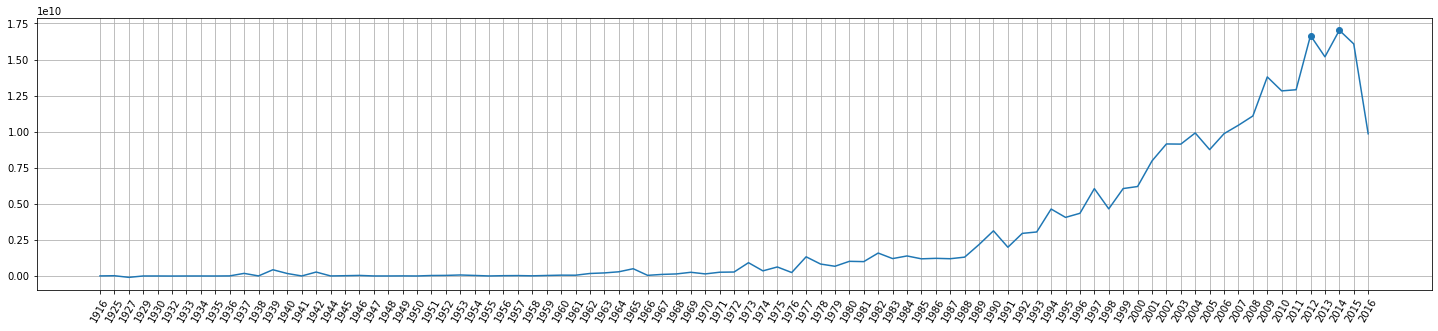

In [62]:
# Code here
plt.figure(figsize=(25, 5))
plt.plot(most_profitable_year.release_year.values, most_profitable_year.profit.values, "-o",markevery=[86,84])
plt.xticks(rotation=60)
plt.grid()
plt.show()


#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.


In [63]:
# create genre dict to hold frequency of genre
# get each row.genres value
# for each genre in row.genres 
# increment number of that genre in a dictionary
# "['Action', 'Adventure', 'Fantasy', 'Science Fiction']"

freq = {}


def genre_count(row):
    temp = row.genres[1:-1]# get only the values between the brackets
    temp = temp.split(", ") # split by , and whitespace
    # iterate through genres in list
    for genre in temp:
        # if genre doesnt exist in dict initilise it with 1
        if genre[1:-1] not in freq:    
            freq[genre[1:-1]] =1
        # else if it already exist add 1 to count   
        else:
           freq[genre[1:-1]] +=1

movies_df.apply(genre_count,axis=1)
print(freq)



{'Action': 918, 'Adventure': 661, 'Fantasy': 342, 'Science Fiction': 431, 'Crime': 521, 'Drama': 1441, 'Thriller': 935, 'Animation': 188, 'Family': 365, 'Western': 57, 'Comedy': 1110, 'Romance': 574, 'Horror': 332, 'Mystery': 265, 'History': 145, 'War': 120, 'Music': 111, 'Documentary': 38, 'Foreign': 5, '': 1}


In [64]:
# iterate through each key in dict and change the value of each key into a list with that value
for key in freq: 
    freq[key] = [freq[key]] 

# created a dataframe from the dict 
freq_df = pd.DataFrame(freq)
# select all rows from the data frame exept the last row which was whitespace
freq_df = freq_df.iloc[:-1,:]

# adjusted(flipped) the data frame with transpose()
freq_df = freq_df.transpose()
freq_df


""
Action
Adventure
Fantasy
Science Fiction
Crime
Drama
Thriller
Animation
Family
Western


In [65]:
plt.figure(figsize=(15, 5))
sns.barplot(freq_df, x = freq_df.index , y = 0 )


AttributeError: 'bool' object has no attribute 'all'

<Figure size 1080x360 with 0 Axes>

Comparison of most expensive movies(profit) VS Cheapest movies(profit)

C:\Users\nemet\AppData\Local\Temp\ipykernel_12396\771798543.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(top_5["title"],rotation=90)
C:\Users\nemet\AppData\Local\Temp\ipykernel_12396\771798543.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(bottom_5["title"],rotation=90)


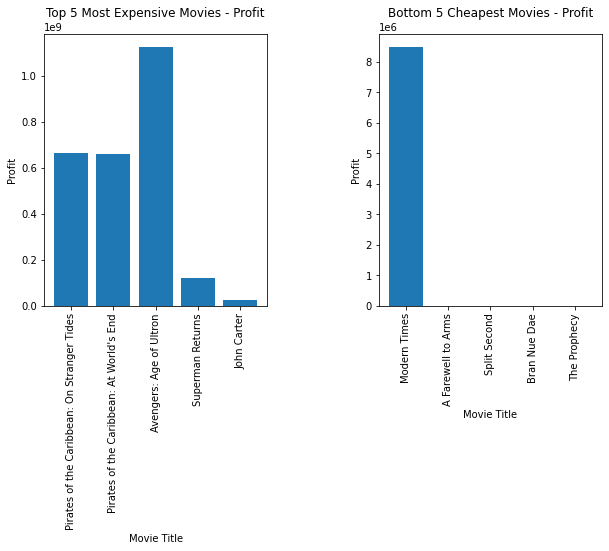

In [ ]:
#### Generate three different interesting visualisations with a data story.

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.5, hspace=1.5)



axs[0].bar(top_5["title"], top_5["profit"])
axs[0].set_xlabel("Movie Title")
axs[0].set_ylabel("Profit")
axs[0].set_title("Top 5 Most Expensive Movies - Profit")
axs[0].set_xticklabels(top_5["title"],rotation=90)

axs[1].bar(bottom_5["title"], bottom_5["profit"])
axs[1].set_xlabel("Movie Title")
axs[1].set_ylabel("Profit")
axs[1].set_title("Bottom 5 Cheapest Movies - Profit")
axs[1].set_xticklabels(bottom_5["title"],rotation=90)
plt.show()







Movie Runtime

Text(0.5, 0, 'Movie running time(minutes)')

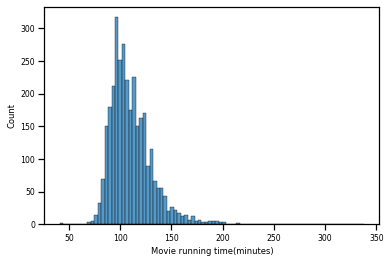

In [ ]:
sns.histplot(data=movies_df['runtime'])
plt.xlabel('Movie running time(minutes)')

Percentage of Films by Year.

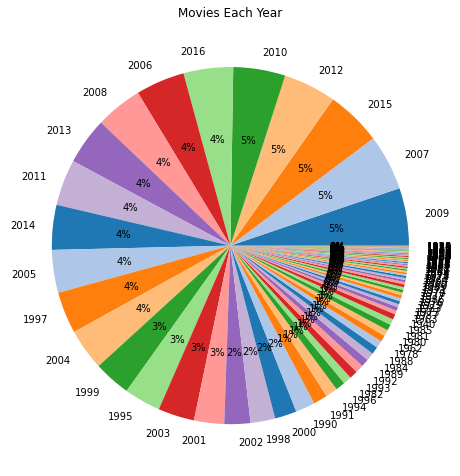

In [ ]:
plt.figure(figsize=(8,15));
data = movies_df['release_year'].value_counts()
labels = movies_df['release_year'].unique()
colors = sns.color_palette('tab20')[0:10]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Movies Each Year')
plt.show()

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)